**Data sebagian**
1. berapa banyak pendapatan yang dihasilkan dari 1 -11 januari 2019 dan rincian menurut tim
2. berapa banyak pelanggan berbayar unik yang dihasilkan dari 1 -11 Januari 2019. silakan uraikan menurut tim. pelanggan berbayar unik mengacu pada ID adverbser
3. berapa pendapatan per produk ? dan apa paket favorit yang dijual (berdasarkan pendapatan) ?
4. silakan plot pendapatan dalam grafik setiap hari
5. berapa pertumbuhan tahun ini vs tahun lalu (data tahun lalu dalam "lembar kerja data tahun lalu") menurut produk
6. silakan lakukan analisis sederhana faktor apa yang menyebabkan pertumbuhan negatif / positif vs tahun lalu dan rencana tindakan apa yang perlu diambil?


**Data keseluruhan**

7. Pada bulan apa penjualan terbanyak?
8. Apa metode pembayaran yang memiliki transaksi terbanyak?
9. Kapan waktu terbaik untuk melakukan promosi?
10. Apakah Member melakukan pembelian lebih banyak daripada Non Member?
11. Apa Produk yang paling banyak dibeli?
12. Kota mana yang memiliki pendapatan bersih terbanyak?

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('supermarket_sales.csv')
df.head()

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3


In [3]:
df.Date.unique()

array(['1/5/2019', '3/8/2019', '3/3/2019', '1/27/2019', '2/8/2019',
       '3/25/2019', '2/25/2019', '2/24/2019', '1/10/2019', '2/20/2019',
       '2/6/2019', '3/9/2019', '2/12/2019', '2/7/2019', '3/29/2019',
       '1/15/2019', '3/11/2019', '1/1/2019', '1/21/2019', '3/5/2019',
       '3/15/2019', '2/17/2019', '3/2/2019', '3/22/2019', '3/10/2019',
       '1/25/2019', '1/28/2019', '1/7/2019', '3/23/2019', '1/17/2019',
       '2/2/2019', '3/4/2019', '3/16/2019', '2/27/2019', '2/10/2019',
       '3/19/2019', '2/3/2019', '3/7/2019', '2/28/2019', '3/27/2019',
       '1/20/2019', '3/12/2019', '2/15/2019', '3/6/2019', '2/14/2019',
       '3/13/2019', '1/24/2019', '1/6/2019', '2/11/2019', '1/22/2019',
       '1/13/2019', '1/9/2019', '1/12/2019', '1/26/2019', '1/23/2019',
       '2/23/2019', '1/2/2019', '2/9/2019', '3/26/2019', '3/1/2019',
       '2/1/2019', '3/28/2019', '3/24/2019', '2/5/2019', '1/19/2019',
       '1/16/2019', '1/8/2019', '2/18/2019', '1/18/2019', '2/16/2019',
       '2/22/201

In [10]:
# Filter the DataFrame for the specified date range
#date_range_mask = (df.index >= '2019-01-01') & (df.index <= '2019-01-20')
#filtered_df = df[date_range_mask]

# Calculate the total income for the specified date range
#total_income = filtered_df['Income'].sum()

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [6]:
df.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [5]:
df['Date'] = pd.to_datetime(df['Date'])

1. berapa banyak pendapatan yang dihasilkan dari 1 -11 januari 2019 dan rincian menurut tim

In [12]:
df_jan = df[(df['Date'] >= '2019-01-01') & (df['Date'] <= '2019-01-11')]
df_jan

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
8,665-32-9167,A,Yangon,Member,Female,Health and beauty,36.26,2,3.6260,76.1460,2019-01-10,17:15,Credit card,72.52,4.761905,3.6260,7.2
17,765-26-6951,A,Yangon,Normal,Male,Sports and travel,72.61,6,21.7830,457.4430,2019-01-01,10:39,Credit card,435.66,4.761905,21.7830,6.9
32,640-49-2076,B,Mandalay,Normal,Male,Sports and travel,83.78,8,33.5120,703.7520,2019-01-10,14:49,Cash,670.24,4.761905,33.5120,5.1
35,232-16-2483,C,Naypyitaw,Member,Female,Sports and travel,68.12,1,3.4060,71.5260,2019-01-07,12:28,Ewallet,68.12,4.761905,3.4060,6.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
956,577-34-7579,C,Naypyitaw,Member,Male,Food and beverages,50.49,9,22.7205,477.1305,2019-01-10,17:16,Cash,454.41,4.761905,22.7205,5.4
958,867-47-1948,C,Naypyitaw,Normal,Female,Home and lifestyle,15.80,10,7.9000,165.9000,2019-01-09,12:07,Cash,158.00,4.761905,7.9000,7.8
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.3150,888.6150,2019-01-01,11:36,Credit card,846.30,4.761905,42.3150,9.0
984,189-40-5216,C,Naypyitaw,Normal,Male,Electronic accessories,96.37,7,33.7295,708.3195,2019-01-09,11:40,Cash,674.59,4.761905,33.7295,6.0


In [13]:
df_jan['gross income'].sum()

1636.6009999999999

2. berapa banyak pelanggan berbayar unik yang dihasilkan dari 1 -11 Januari 2017. silakan uraikan menurut tim. pelanggan berbayar unik mengacu pada ID adverbser

In [15]:
df['Invoice ID'].unique()

array(['750-67-8428', '226-31-3081', '631-41-3108', '123-19-1176',
       '373-73-7910', '699-14-3026', '355-53-5943', '315-22-5665',
       '665-32-9167', '692-92-5582', '351-62-0822', '529-56-3974',
       '365-64-0515', '252-56-2699', '829-34-3910', '299-46-1805',
       '656-95-9349', '765-26-6951', '329-62-1586', '319-50-3348',
       '300-71-4605', '371-85-5789', '273-16-6619', '636-48-8204',
       '549-59-1358', '227-03-5010', '649-29-6775', '189-17-4241',
       '145-94-9061', '848-62-7243', '871-79-8483', '149-71-6266',
       '640-49-2076', '595-11-5460', '183-56-6882', '232-16-2483',
       '129-29-8530', '272-65-1806', '333-73-7901', '777-82-7220',
       '280-35-5823', '554-53-8700', '354-25-5821', '228-96-1411',
       '617-15-4209', '132-32-9879', '370-41-7321', '727-46-3608',
       '669-54-1719', '574-22-5561', '326-78-5178', '162-48-8011',
       '616-24-2851', '778-71-5554', '242-55-6721', '399-46-5918',
       '106-35-6779', '635-40-6220', '817-48-8732', '120-06-42

In [16]:
df['Invoice ID'].nunique()

1000

3. berapa pendapatan per produk ? dan apa paket favorit yang dijual (berdasarkan pendapatan) ?

In [19]:
df.groupby('Branch')['gross income'].sum()

Branch
A    5057.1605
B    5057.0320
C    5265.1765
Name: gross income, dtype: float64

4. silakan plot pendapatan dalam grafik setiap hari

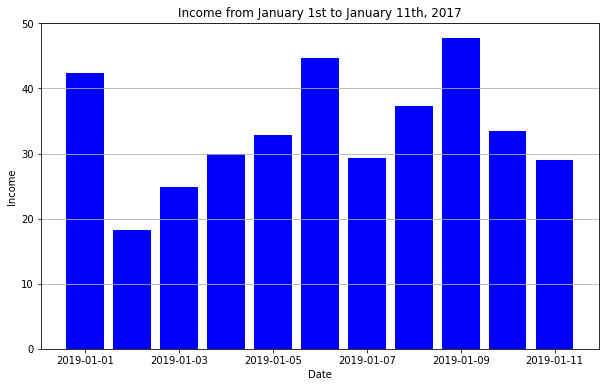

In [33]:
plt.figure(figsize=(10, 6))
plt.bar(df_jan.Date, df_jan['gross income'], color='blue')
plt.title('Income from January 1st to January 11th, 2017')
plt.xlabel('Date')
plt.ylabel('Income')
plt.grid(axis='y')
plt.show()

In [37]:
df_jan.sort_values(by='gross income', ascending = False)[['Date', 'gross income']].head(10)

,Date,gross income
357,2019-01-09,47.7200
70,2019-01-06,44.7400
970,2019-01-01,42.3150
267,2019-01-08,37.3000
829,2019-01-01,37.1100
703,2019-01-06,36.2115
984,2019-01-09,33.7295
32,2019-01-10,33.5120
945,2019-01-05,32.8580
848,2019-01-08,32.7960


5. berapa pertumbuhan bulan ini vs bulan lalu (data bulan lalu dalam "lembar kerja data bulan lalu") menurut produk

In [38]:
df_Feb = df[(df['Date'] >= '2019-02-01') & (df['Date'] <= '2019-02-11')]
df_Feb

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2019-02-06,18:07,Ewallet,57.92,4.761905,2.8960,4.5
13,252-56-2699,A,Yangon,Normal,Male,Food and beverages,43.19,10,21.5950,453.4950,2019-02-07,16:48,Ewallet,431.90,4.761905,21.5950,8.2
26,649-29-6775,B,Mandalay,Normal,Male,Fashion accessories,33.52,1,1.6760,35.1960,2019-02-08,15:31,Cash,33.52,4.761905,1.6760,6.7
34,183-56-6882,C,Naypyitaw,Member,Female,Food and beverages,99.42,4,19.8840,417.5640,2019-02-06,10:42,Ewallet,397.68,4.761905,19.8840,7.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
973,531-56-4728,A,Yangon,Normal,Male,Home and lifestyle,80.08,3,12.0120,252.2520,2019-02-11,15:29,Cash,240.24,4.761905,12.0120,5.4
974,744-82-9138,C,Naypyitaw,Normal,Male,Fashion accessories,86.13,2,8.6130,180.8730,2019-02-07,17:59,Cash,172.26,4.761905,8.6130,8.2
979,151-33-7434,B,Mandalay,Normal,Female,Food and beverages,67.77,1,3.3885,71.1585,2019-02-04,20:43,Credit card,67.77,4.761905,3.3885,6.5
985,374-38-5555,B,Mandalay,Normal,Female,Fashion accessories,63.71,5,15.9275,334.4775,2019-02-07,19:30,Ewallet,318.55,4.761905,15.9275,8.5


In [39]:
df_Feb.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 134 entries, 4 to 997
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               134 non-null    object        
 1   Branch                   134 non-null    object        
 2   City                     134 non-null    object        
 3   Customer type            134 non-null    object        
 4   Gender                   134 non-null    object        
 5   Product line             134 non-null    object        
 6   Unit price               134 non-null    float64       
 7   Quantity                 134 non-null    int64         
 8   Tax 5%                   134 non-null    float64       
 9   Total                    134 non-null    float64       
 10  Date                     134 non-null    datetime64[ns]
 11  Time                     134 non-null    object        
 12  Payment                  134 non-nul

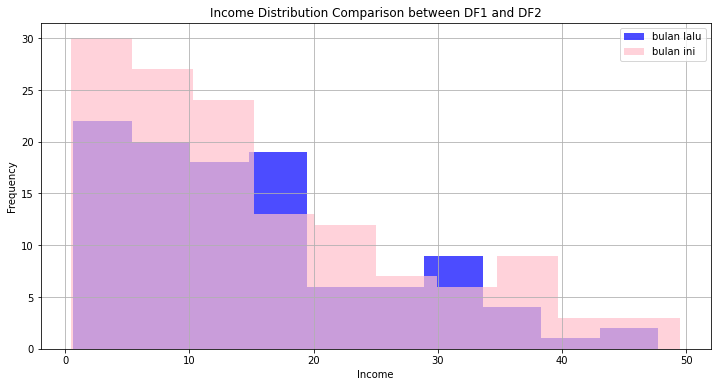

In [47]:
plt.figure(figsize=(12, 6))
# Histogram for df_jan
plt.hist(df_jan['gross income'], bins=10, color='blue', alpha=0.7, label='bulan lalu')

# Histogram for df_Feb
plt.hist(df_Feb['gross income'], bins=10, color='pink', alpha=0.7, label='bulan ini')

plt.title('Income Distribution Comparison between DF1 and DF2')
plt.xlabel('Income')
plt.ylabel('Frequency')
plt.legend()
plt.grid(True)
plt.show()

In [51]:
a = df_jan['gross income'].sum()

In [50]:
b = df_Feb['gross income'].sum()

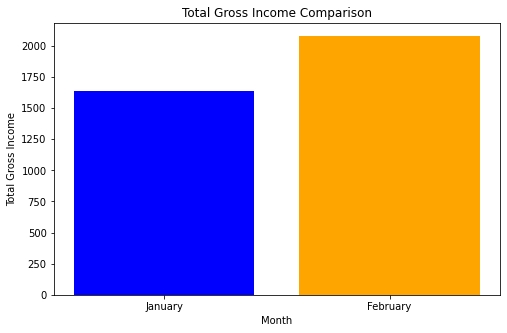

In [53]:
plt.figure(figsize=(8, 5))
plt.bar(['January', 'February'], [a, b], color=['blue', 'orange'])
plt.title('Total Gross Income Comparison')
plt.xlabel('Month')
plt.ylabel('Total Gross Income')
plt.show()

6. silakan lakukan analisis sederhana faktor apa yang menyebabkan pertumbuhan negatif / positif vs bulan lalu dan rencana tindakan apa yang perlu diambil?

In [91]:
df_jan.sort_values(by = 'gross income', ascending =False)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
357,554-42-2417,C,Naypyitaw,Normal,Female,Sports and travel,95.44,10,47.720,1002.120,2019-01-09,13:45,Cash,954.40,4.761905,47.720,5.2
70,393-65-2792,C,Naypyitaw,Normal,Male,Food and beverages,89.48,10,44.740,939.540,2019-01-06,12:46,Credit card,894.80,4.761905,44.740,9.6
970,746-04-1077,B,Mandalay,Member,Female,Food and beverages,84.63,10,42.315,888.615,2019-01-01,11:36,Credit card,846.30,4.761905,42.315,9.0
267,571-94-0759,B,Mandalay,Member,Female,Food and beverages,74.60,10,37.300,783.300,2019-01-08,20:55,Cash,746.00,4.761905,37.300,9.5
829,416-17-9926,A,Yangon,Member,Female,Electronic accessories,74.22,10,37.110,779.310,2019-01-01,14:42,Credit card,742.20,4.761905,37.110,4.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
271,687-15-1097,C,Naypyitaw,Member,Female,Health and beauty,21.12,2,2.112,44.352,2019-01-03,19:17,Cash,42.24,4.761905,2.112,9.7
501,573-98-8548,C,Naypyitaw,Member,Female,Fashion accessories,31.90,1,1.595,33.495,2019-01-05,12:40,Ewallet,31.90,4.761905,1.595,9.1
861,840-76-5966,A,Yangon,Member,Male,Sports and travel,12.76,2,1.276,26.796,2019-01-08,18:06,Ewallet,25.52,4.761905,1.276,7.8
282,490-29-1201,A,Yangon,Normal,Female,Sports and travel,15.34,1,0.767,16.107,2019-01-06,11:09,Cash,15.34,4.761905,0.767,6.5


<AxesSubplot: >

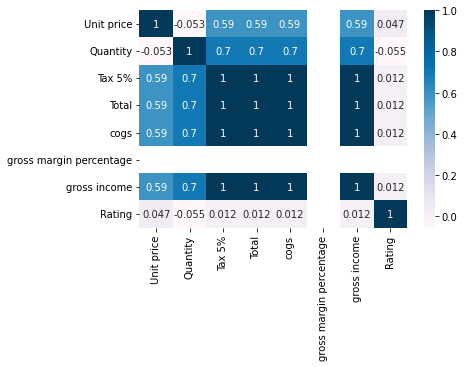

In [58]:
sns.heatmap(df_jan.corr(), annot =True, cmap = 'PuBu')

ternyata unit price, quality dan yang mempengaruhi paling mempengaruhi income adalah tax 5%, total dan cogs

In [70]:
#coba kita lihat berdasarkan unit mahal dan murah untuk mengetahui income
df_jan.groupby('Unit price')['gross income'].sum().sort_values(ascending=False)

Unit price
95.44    47.7200
89.48    44.7400
84.63    42.3150
74.60    37.3000
74.22    37.1100
          ...   
42.47     2.1235
31.90     1.5950
12.76     1.2760
15.34     0.7670
12.78     0.6390
Name: gross income, Length: 105, dtype: float64

In [68]:
df_jan.groupby('Quantity')['gross income'].sum()

Quantity
1      32.3445
2      49.7140
3      56.9355
4     159.2360
5     101.5450
6     223.7100
7     247.8035
8     154.1800
9     280.5525
10    330.5800
Name: gross income, dtype: float64

diketahui apabila quantity semangin besar maka pendapata juga terus meningkat

In [80]:
df_jan.groupby('Tax 5%')['gross income'].sum().sort_values(ascending=False)

Tax 5%
47.720    47.720
44.740    44.740
42.315    42.315
37.300    37.300
37.110    37.110
           ...  
2.112      2.112
1.595      1.595
1.276      1.276
0.767      0.767
0.639      0.639
Name: gross income, Length: 107, dtype: float64

kolom tax memiliki nilai yg sama dengan income

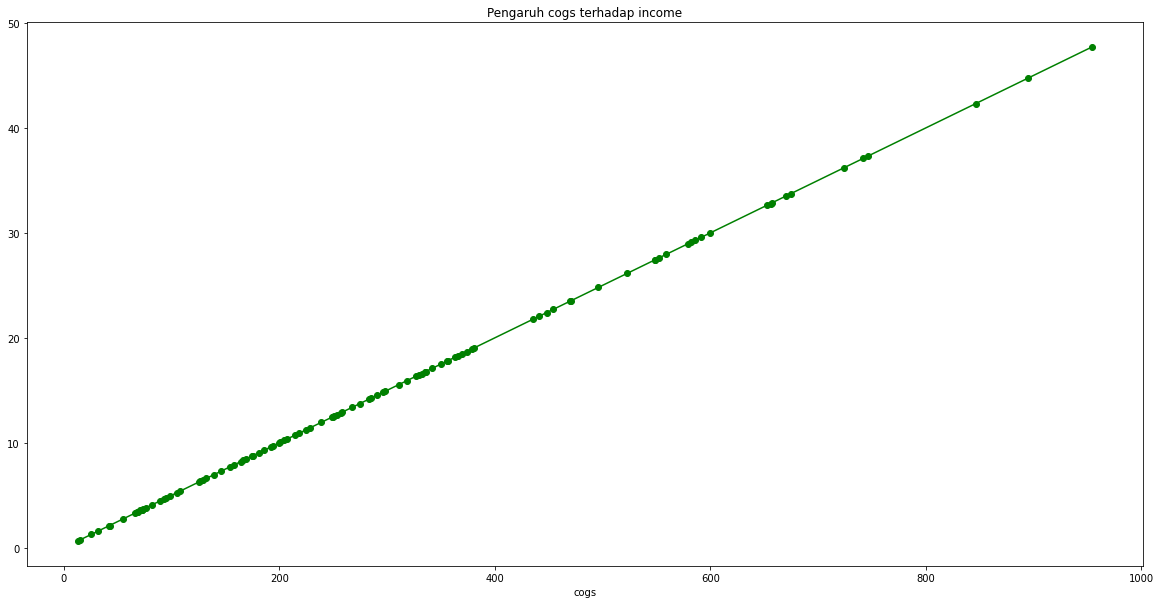

In [105]:
plt.figure(figsize=(20,10))
df_jan.groupby('cogs')['gross income'].sum().sort_values(ascending=False).plot(kind='line', marker='o', color='green')
plt.title('Pengaruh cogs terhadap income')
plt.show()

apabila jumlah dari kolom cogs tinggi maka pendaptan/income akan juga meningkat

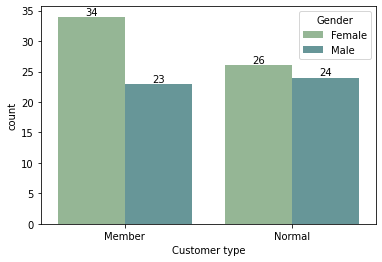

In [128]:
ax = sns.countplot(data = df_jan, x='Customer type', hue = 'Gender', palette=['#8FBC8F','#5F9EA0'])
# Adding labels to each bar
for container in ax.containers:
    ax.bar_label(container, fmt='%d', label_type='edge')
plt.show()

In [124]:
df_jan['Customer type'].value_counts()

Member    57
Normal    50
Name: Customer type, dtype: int64

In [168]:
df_jan.groupby(['Customer type', 'Branch'])['gross income'].sum().sort_values(ascending=False)

Customer type  Branch
Member         B         318.8945
Normal         C         292.2225
Member         A         287.3795
Normal         A         275.4025
Member         C         267.1605
Normal         B         195.5415
Name: gross income, dtype: float64

In [174]:
df_jan.groupby(['Customer type', 'Branch', 'Gender'])['gross income'].sum().sort_values(ascending=False)

Customer type  Branch  Gender
Member         B       Female    203.3850
               C       Female    187.8985
Normal         C       Female    184.5480
Member         A       Male      167.9995
Normal         A       Female    165.2080
Member         A       Female    119.3800
               B       Male      115.5095
Normal         A       Male      110.1945
               C       Male      107.6745
               B       Male      102.8115
                       Female     92.7300
Member         C       Male       79.2620
Name: gross income, dtype: float64

- Positif
1. paling banyak costype **member** dan untuk gender adalah **female**
2. cutumer type **member** dengan branch **B** meiliki income tertinggi
3. cutumer type **member** dengan branch **B** dan gender **female** yg memiliki pendapatan tertinggi
- Negative
1. costumer type normal paling rendah
2. cutumer type **normal** dengan branch **B** memiliki income rendah
3. cutumer type **normal** dengan branch **B** dan gender **male** memiliki income rendah

In [175]:
df_jan.Branch.value_counts()

A    39
C    36
B    32
Name: Branch, dtype: int64

In [149]:
df_jan.groupby('Branch')['gross income'].sum().sort_values(ascending=False)

Branch
A    562.782
C    559.383
B    514.436
Name: gross income, dtype: float64

income tertinggi berdasarkan branch ada pada branch A 

In [166]:
df_jan.City.value_counts()

Yangon       39
Naypyitaw    36
Mandalay     32
Name: City, dtype: int64

In [176]:
df_jan.groupby('City')['gross income'].sum().sort_values(ascending=False)

City
Yangon       562.782
Naypyitaw    559.383
Mandalay     514.436
Name: gross income, dtype: float64

In [171]:
df_jan.groupby(['City', 'Branch'])['gross income'].sum().sort_values(ascending=False)

City       Branch
Yangon     A         562.782
Naypyitaw  C         559.383
Mandalay   B         514.436
Name: gross income, dtype: float64

berdasarkan kota yagon dengan branch A memiliki pendapatan lebih tinggi dan terendah ada pada kota mandalay dengan branch B

In [172]:
df_jan.groupby(['City', 'Branch', 'Product line'])['gross income'].sum().sort_values(ascending=False)

City       Branch  Product line          
Yangon     A       Home and lifestyle        176.7070
Naypyitaw  C       Food and beverages        148.2715
Mandalay   B       Fashion accessories       142.3530
Naypyitaw  C       Sports and travel         128.8650
Mandalay   B       Food and beverages        126.0560
Naypyitaw  C       Fashion accessories       117.4790
Yangon     A       Electronic accessories    107.4965
                   Sports and travel         105.1470
Naypyitaw  C       Electronic accessories     88.7415
Mandalay   B       Health and beauty          78.1165
                   Sports and travel          77.0310
Yangon     A       Health and beauty          62.8760
                   Fashion accessories        58.6020
Mandalay   B       Home and lifestyle         55.4990
Yangon     A       Food and beverages         51.9535
Naypyitaw  C       Health and beauty          39.8045
                   Home and lifestyle         36.2215
Mandalay   B       Electronic accessorie

kota yagon dengan branch A dan prodeuk home and lifestle memiliki income tertinggi  sedangkan kota mandelay dengan branch B dan produk electronic accecories memiliki income terendah

In [74]:
df_jan['Product line'].value_counts()

Sports and travel         24
Fashion accessories       21
Home and lifestyle        19
Food and beverages        18
Electronic accessories    13
Health and beauty         12
Name: Product line, dtype: int64

Berdasarkan dari data bahwasannya produk sports and travel yang banyak peminat pada bulan januari namun pendapatan tidak sesuai analisis dibawah ini dapat diakibatkan bisa dari kolom price

In [173]:
df_jan.groupby('Product line')['gross income'].sum().sort_values(ascending=False)


Product line
Food and beverages        326.2810
Fashion accessories       318.4340
Sports and travel         311.0430
Home and lifestyle        268.4275
Electronic accessories    231.6185
Health and beauty         180.7970
Name: gross income, dtype: float64

berdasarkan total dari income sebuat produk dapat dilihat produk food and beverges memiliki income tertinggi

# Conclution # Data Sebagian

#### conclution dari penjualan bulan januari

#positif
- member
- branch A
- city yagon
- product line Food and beverages

#negative
- normal
- branch B
- city Mandalay
- Health and beauty

In [178]:
df_Feb.head(2)

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2019-02-08,10:37,Ewallet,604.17,4.761905,30.2085,5.3
10,351-62-0822,B,Mandalay,Member,Female,Fashion accessories,14.48,4,2.8960,60.8160,2019-02-06,18:07,Ewallet,57.92,4.761905,2.8960,4.5


In [179]:
df_Feb['Customer type'].value_counts()

Member    75
Normal    59
Name: Customer type, dtype: int64

In [180]:
df_Feb.groupby('Customer type')['gross income'].sum().sort_values(ascending=False)

Customer type
Member    1091.6200
Normal     989.2085
Name: gross income, dtype: float64

In [181]:
df_Feb.Branch.value_counts()

C    49
B    44
A    41
Name: Branch, dtype: int64

In [182]:
df_Feb.groupby('Branch')['gross income'].sum().sort_values(ascending=False)

Branch
C    807.3035
B    658.6575
A    614.8675
Name: gross income, dtype: float64

In [183]:
#City
df_Feb.groupby('City')['gross income'].sum().sort_values(ascending=False)

City
Naypyitaw    807.3035
Mandalay     658.6575
Yangon       614.8675
Name: gross income, dtype: float64

In [184]:
df_Feb.groupby('Gender')['gross income'].sum().sort_values(ascending=False)

Gender
Female    1129.9970
Male       950.8315
Name: gross income, dtype: float64

In [185]:
df_Feb.groupby('Product line')['gross income'].sum().sort_values(ascending=False)

Product line
Food and beverages        426.0715
Fashion accessories       411.7305
Home and lifestyle        381.8860
Health and beauty         297.4920
Sports and travel         290.6550
Electronic accessories    272.9935
Name: gross income, dtype: float64

conclution dari penjualan bulan februari

#positif
- gander Female
- member
- branch C
- city Naypyitaw
- product line Food and beverages

#negative
- gander male
- normal
- branch A
- city Yangon
- product line Electronic accessories



# Analisis Data Keseluruhan

In [186]:
df.head(2)


,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,2019-01-05,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,2019-03-08,10:29,Cash,76.40,4.761905,3.8200,9.6


In [187]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Invoice ID               1000 non-null   object        
 1   Branch                   1000 non-null   object        
 2   City                     1000 non-null   object        
 3   Customer type            1000 non-null   object        
 4   Gender                   1000 non-null   object        
 5   Product line             1000 non-null   object        
 6   Unit price               1000 non-null   float64       
 7   Quantity                 1000 non-null   int64         
 8   Tax 5%                   1000 non-null   float64       
 9   Total                    1000 non-null   float64       
 10  Date                     1000 non-null   datetime64[ns]
 11  Time                     1000 non-null   object        
 12  Payment                  1000 non-n

7. Pada bulan apa penjualan terbanyak?

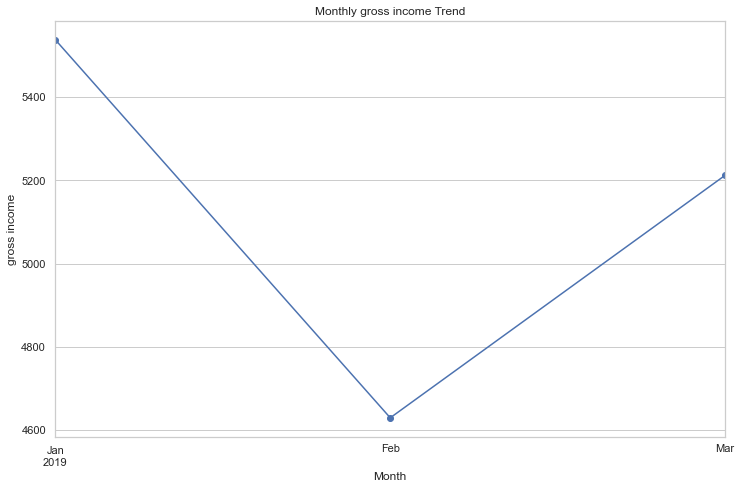

In [188]:
# Group the data by months and calculate the total sales amount for each month
monthly_sales = df.groupby(df['Date'].dt.to_period('M'))['gross income'].sum()

# Plot the sales trends for months
plt.figure(figsize=(12, 26))

# Monthly Sales Trend
plt.subplot(3, 1, 1)
monthly_sales.plot(kind='line', marker='o')
plt.title('Monthly gross income Trend')
plt.xlabel('Month')
plt.ylabel('gross income')

# Adjust layout and display the plots
# plt.tight_layout()
plt.show()

8. Apa metode pembayaran yang memiliki transaksi terbanyak?

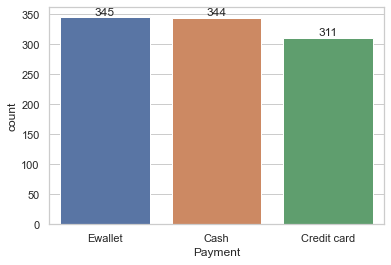

In [191]:
ax = sns.countplot(x=df['Payment'])
ax.bar_label(ax.containers[0])
plt.show()

In [205]:
result = df.groupby(['Payment', 'City', 'Product line'])['gross income'].sum().reset_index()
# Find the index of the row with the highest gross income in each group
idxmax_rows = result.groupby(['Payment', 'City'])['gross income'].idxmax()

# Mark the rows with the highest gross income
result['Highest Income'] = 'No'
result.loc[idxmax_rows, 'Highest Income'] = 'Yes'

result.sort_values(by = 'gross income', ascending = False)

,Payment,City,Product line,gross income,Highest Income
8,Cash,Naypyitaw,Food and beverages,540.3915,Yes
16,Cash,Yangon,Home and lifestyle,466.2805,Yes
6,Cash,Naypyitaw,Electronic accessories,459.3790,No
20,Credit card,Mandalay,Food and beverages,408.3410,Yes
5,Cash,Mandalay,Sports and travel,378.1635,Yes
43,Ewallet,Naypyitaw,Fashion accessories,372.8835,Yes
52,Ewallet,Yangon,Home and lifestyle,372.0435,Yes
40,Ewallet,Mandalay,Home and lifestyle,368.1165,Yes
3,Cash,Mandalay,Health and beauty,367.9990,No
7,Cash,Naypyitaw,Fashion accessories,365.1940,No


9. Kapan waktu terbaik untuk melakukan promosi?

In [192]:
df.Time.value_counts().head(10)

19:48    7
14:42    7
17:38    6
17:16    5
11:40    5
13:48    5
19:39    5
19:20    5
17:36    5
13:58    5
Name: Time, dtype: int64

In [210]:
df.groupby(['Time', 'Quantity'])['gross income'].sum().sort_values(ascending = False).head(10)

Time   Quantity
13:00  10          110.610
13:48  10           93.935
11:25  10           75.350
10:33  7            71.624
19:38  9            64.107
16:19  10           61.250
15:01  10           61.170
10:43  9            60.210
14:42  10           57.655
19:57  10           56.310
Name: gross income, dtype: float64

10. Apakah Member melakukan pembelian lebih banyak daripada Non Member?

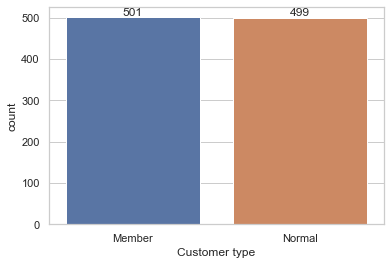

In [193]:
ax = sns.countplot(x=df['Customer type'])
ax.bar_label(ax.containers[0])
plt.show()

11. Apa Produk yang paling banyak dibeli?

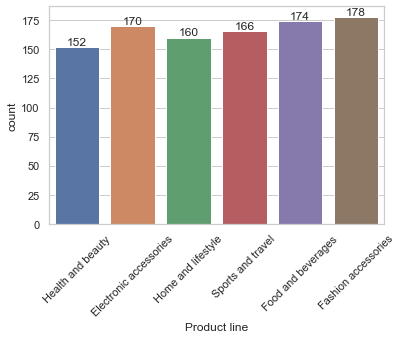

In [196]:
#berdasarkan nili count
ax = sns.countplot(x=df['Product line'])
ax.bar_label(ax.containers[0])
plt.xticks(rotation=45)
plt.show()

In [215]:
#berdasarkan penggabungan nama produk jumlah quantity
df.groupby(['Product line'])['Quantity'].sum().sort_values(ascending = False)

Product line
Electronic accessories    971
Food and beverages        952
Sports and travel         920
Home and lifestyle        911
Fashion accessories       902
Health and beauty         854
Name: Quantity, dtype: int64

12. Kota mana yang memiliki pendapatan bersih terbanyak?

In [218]:
df.groupby(['City', 'Quantity'])['gross income'].sum()

City       Quantity
Mandalay   1             95.7440
           2            183.7490
           3            289.5225
           4            394.1560
           5            388.7600
           6            628.4580
           7            575.2250
           8            670.4200
           9            873.6075
           10           957.3900
Naypyitaw  1            114.3945
           2            182.2870
           3            178.4160
           4            400.9080
           5            345.2125
           6            457.8480
           7            828.5095
           8            633.9080
           9            705.0780
           10          1418.6150
Yangon     1             96.6400
           2            157.5260
           3            297.8565
           4            407.2180
           5            554.1900
           6            554.4180
           7            675.5350
           8            615.4960
           9            744.3360
           10          